In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading CSV
df = pd.read_csv('Student_Performance.CSV')
#dropping the redundant columns
df = df.drop(['Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced'],axis=1)
#converting target variable into categorical 
df['Performance Index'] = df['Performance Index'].apply(lambda x: 1 if x>=60 else 0)
#renaming the final columns
df = df.rename(columns = {'Hours Studied':'hours_studied',
                      'Previous Scores': 'previous_scores',
                      'Performance Index': 'well_performed?'})

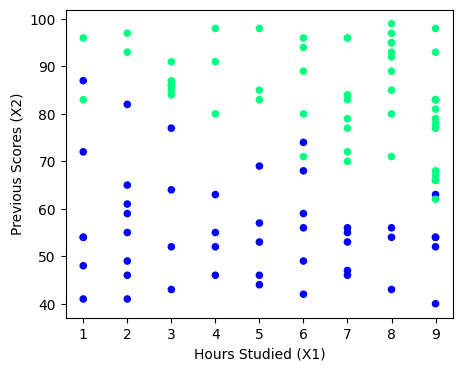

In [3]:
#fetching 100 reproducible random numbers
np.random.seed(42)
rand_nums = np.random.choice(range(df.shape[0]),100,replace=False)

#creating a new DataFrame with 100 samples and resetting the indices
df_new = pd.DataFrame(df.iloc[rand_nums])
df_new = df_new.reset_index(drop=True)

#scatter plot: green points - Well Performed || blue points - NOT Well Performed
plt.figure(figsize=(5,4))
plt.scatter(df_new['hours_studied'],df_new['previous_scores'],c=df_new['well_performed?'],cmap='winter',s=20)
plt.xlabel('Hours Studied (X1)')
plt.ylabel('Previous Scores (X2)')

#segregating i/p and o/p variables
X = df_new.iloc[:,0:2]
y = df_new.iloc[:,-1]

Bias (perceptron-trick):  -2345.599999998962
Coefficients (perceptron-trick):  [77.5 26.3]


Slope (perceptron-trick):  -2.946768060839031
y-intercept (perceptron-trick):  89.18631178709184




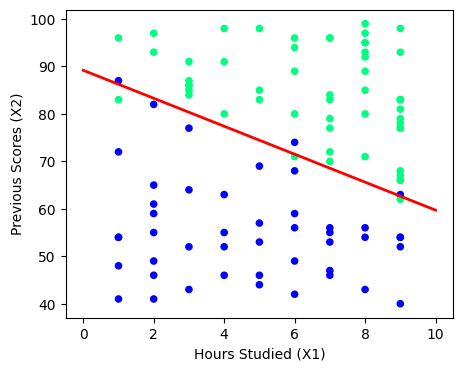

In [4]:
# defining own class for Perceptron Trick

class perceptron_trick:

    #defining constructor with hyperparameters
    def __init__(self,epochs,learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate

    #method_1: iterating the weights of the classification line
    def perception(self,X,y):
        
        #inserting '1' to each row of i/p variables  
        X = np.insert(X,0,1,axis=1)
        #initializing the coefficients
        weights = np.ones(X.shape[1])

        #converting predicted o/p into step function 
        def stepwise_func(f):
            return 1 if f>=0 else 0

        #iterating through loops no. of epochs times
        for i in range(self.epochs):
            #generating random numbers no. of epochs times
            random_num = np.random.randint(0,X.shape[0])
            #updating weights with a randomly choosen row/epoch
            y_cap = stepwise_func(np.dot(X[random_num],weights))
            weights = weights + (self.learning_rate * (y[random_num] - y_cap) * X[random_num])
        #returning the final weights
        return(weights[0], weights[1:])

#creating an object with defined hyperparameters
perceptron_obj = perceptron_trick(epochs=2000000,learning_rate=0.1)
#final bias and coefficients
[intercept, coef] = perceptron_obj.perception(X,y)

#calculating slope and y-intercept
m = - (coef[0]/coef[1])
b = - (intercept/coef[1])

#plotting the classification line
x_points = np.linspace(0,10,100)
y_points = m*x_points + b

plt.figure(figsize=(5,4))
plt.plot(x_points,y_points,color='red',linewidth=2)
plt.scatter(df_new['hours_studied'],df_new['previous_scores'],c=df_new['well_performed?'],cmap='winter',s=20)
plt.xlabel('Hours Studied (X1)')
plt.ylabel('Previous Scores (X2)')

print('Bias (perceptron-trick): ',intercept)
print('Coefficients (perceptron-trick): ',coef)
print('\n')

print('Slope (perceptron-trick): ',m)
print('y-intercept (perceptron-trick): ',b)
print('\n')

Bias (sklearn-LogisticRegression):  [-39.1937722]
Coefficients (sklearn-LogisticRegression):  [[1.32174506 0.44215249]]


Slope (sklearn-LogisticRegression):  -2.9893421382524488
y-intercept (sklearn-LogisticRegression):  [88.64311171]


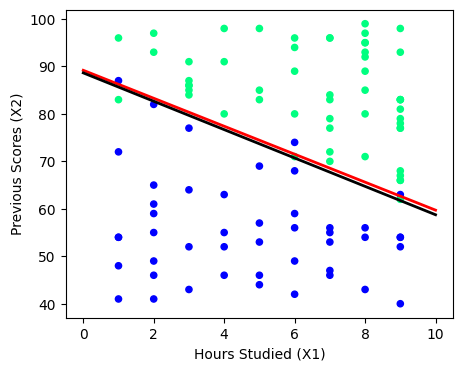

In [5]:
#---------------------------
#defining Scikit-learn LogisticRegression class

#importing LogisticRegression
from sklearn.linear_model import LogisticRegression
#creating an object
lor_obj = LogisticRegression()
#fitting the model
lor_obj.fit(X,y)

#calculating slope and y-intercept
m1 = - (lor_obj.coef_[0][0]/lor_obj.coef_[0][1])
b1 = - (lor_obj.intercept_/lor_obj.coef_[0][1]) 

#plotting the classification line
x_points1 = np.linspace(0,10,100)
y_points1 = m1*x_points1 + b1

plt.figure(figsize=(5,4))
plt.plot(x_points,y_points,color='red',linewidth=2) #with perceptron trick
plt.plot(x_points1,y_points1,color='black',linewidth=2) #with sklearn LogisticRegression
plt.scatter(df_new['hours_studied'],df_new['previous_scores'],c=df_new['well_performed?'],cmap='winter',s=20)
plt.xlabel('Hours Studied (X1)')
plt.ylabel('Previous Scores (X2)')

print('Bias (sklearn-LogisticRegression): ',lor_obj.intercept_)
print('Coefficients (sklearn-LogisticRegression): ',lor_obj.coef_)
print('\n')

print('Slope (sklearn-LogisticRegression): ',m1)
print('y-intercept (sklearn-LogisticRegression): ',b1)
#---------------------------